In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import glob
import re


In [2]:
# Define a key function that extracts numbers from the file name
def natural_sort_key(file_name):
    return [int(num) if num.isdigit() else num for num in re.split(r'(\d+)', file_name)]

file_names = sorted(glob.glob('mfcc_outputs/*.csv'), key=natural_sort_key)

mfcc_data = []
for file in file_names:
    df = pd.read_csv(file)
    mfcc_data.append(df)

In [3]:
mfcc_data[0]

,0,1,2,3,4,5,6,7,8,9,...,28885,28886,28887,28888,28889,28890,28891,28892,28893,28894
0,-490.61307,-490.61307,-490.61307,-490.61307,-490.61307,-490.61307,-490.61307,-490.61307,-490.61307,-490.61307,...,-454.157440,-356.177250,-337.092100,-347.361970,-369.432040,-456.435800,-490.61307,-490.61307,-490.61307,-490.61307
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,47.922600,118.383354,126.261460,122.323044,111.422090,41.197870,0.00000,0.00000,0.00000,0.00000
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,38.351740,33.786210,31.389004,32.816430,29.333456,24.980583,0.00000,0.00000,0.00000,0.00000
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,26.072548,26.027706,34.899952,30.852432,13.246825,9.893329,0.00000,0.00000,0.00000,0.00000
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,14.475992,19.363810,18.455875,17.122929,13.645853,1.523784,0.00000,0.00000,0.00000,0.00000
5,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,5.587486,11.785564,6.036170,3.799625,6.456463,-2.159295,0.00000,0.00000,0.00000,0.00000
6,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,-0.332173,6.524175,10.377501,9.691541,2.442512,-5.379196,0.00000,0.00000,0.00000,0.00000
7,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,-4.060412,-8.760534,-9.940769,-6.177643,-5.907007,-8.853701,0.00000,0.00000,0.00000,0.00000
8,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,-6.358037,-4.569078,-7.470598,-9.738193,-8.008050,-10.287318,0.00000,0.00000,0.00000,0.00000
9,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,-7.445775,-3.753394,0.238799,1.673137,-1.254346,-8.516781,0.00000,0.00000,0.00000,0.00000


In [4]:
def compute_variance(data):
    variance_list = []
    for mfcc_df in data:
        mfcc_variance = mfcc_df.var(axis=1)
        variance_list.append(mfcc_variance.values)
    variance_df = pd.DataFrame(variance_list, columns=[f'MFCC_{i+1}_variance' for i in range(20)])
    return variance_df

var_data = compute_variance(mfcc_data)
x_values = var_data.columns
print(compute_variance(mfcc_data))


    MFCC_1_variance  MFCC_2_variance  MFCC_3_variance  MFCC_4_variance  \
0       3171.736415       426.384778       867.180676       851.340717   
1       5436.656125       814.696358       488.358263       338.324664   
2       1704.518254       616.939710       862.849568       211.613550   
3       4693.833934       913.251157       657.983472       681.545354   
4       3471.984500       617.085758       419.266500       233.925598   
5       8306.199639      1614.054897       794.389332       424.030253   
6       8419.510707      1182.710431       767.722099       586.954110   
7       6896.330193      1143.523031       672.537671       556.219065   
8       5015.902683       978.686856       491.032215       442.493510   
9      11448.055189      2070.698820      1437.895762       872.036017   
10      4985.181356      1349.343798       875.095105       246.971474   
11      2009.094727       972.962473       668.534957       234.507620   
12      2056.560198       789.380996  

In [5]:
var_before_outlier = np.array(var_data.iloc[0, :])
var_before_outlier

array([3171.73641461,  426.38477794,  867.18067592,  851.34071718,
        467.88310835,  216.10326468,  174.1234047 ,   94.01755583,
        123.99977002,  111.94715969,  124.21817834,   81.40826603,
         78.8259226 ,   84.79173328,   85.88077518,  111.62127321,
         94.75872015,   91.67051752,  112.0597767 ,  109.78016519])

In [6]:
# Z-score 
def apply_zscore_with_outlier_handling(mfcc_data, threshold=2):
    zscore_data = []
    for mfcc_df in mfcc_data:
        def zscore_outlier_cap(row):
            zscore_row = stats.zscore(row)
            capped_row = [min(threshold, max(-threshold, val)) for val in zscore_row]  # Cap values
            return pd.Series(capped_row)  # Ensure each row returns a Pandas Series, not a list
        
        zscore_df = mfcc_df.apply(zscore_outlier_cap, axis=1)
        zscore_data.append(zscore_df)
    return zscore_data

zscore_outlier_data = apply_zscore_with_outlier_handling(mfcc_data)


In [7]:
def winsorize_data(mfcc_data, lower_percentile=0.02, upper_percentile=0.98):
    winsorized_data = []
    
    for mfcc_df in mfcc_data:
        # Calculate the lower and upper thresholds
        lower_threshold = mfcc_df.quantile(lower_percentile, axis=1)
        upper_threshold = mfcc_df.quantile(upper_percentile, axis=1)

        # Winsorize the DataFrame
        winsorized_df = mfcc_df.copy()
        for i in range(len(mfcc_df)):
            winsorized_df.iloc[i] = mfcc_df.iloc[i].clip(lower=lower_threshold[i], upper=upper_threshold[i])
        
        winsorized_data.append(winsorized_df)

    return winsorized_data

winsorized_data = winsorize_data(mfcc_data)


In [8]:
# Z-score with outlier handling variance table
zscore_outlier_variance_df = compute_variance(zscore_outlier_data)
print("Z-score with Outlier Handling Variance Table:")
print(zscore_outlier_variance_df.head())

# Winsorized variance table
winsorized_variance_df = compute_variance(winsorized_data)
print("\nWinsorized Variance Table:")
print(winsorized_variance_df.head())

Z-score with Outlier Handling Variance Table:
   MFCC_1_variance  MFCC_2_variance  MFCC_3_variance  MFCC_4_variance  \
0         0.708582         0.773013         0.658212         0.655893   
1         0.528799         0.708362         0.931048         0.912012   
2         0.787004         0.852553         0.904652         0.893483   
3         0.851282         0.876609         0.900013         0.895763   
4         0.739180         0.702558         0.815418         0.914933   

   MFCC_5_variance  MFCC_6_variance  MFCC_7_variance  MFCC_8_variance  \
0         0.949196         0.887949         0.893425         0.896914   
1         0.921672         0.857281         0.886912         0.898929   
2         0.911932         0.926338         0.894520         0.922382   
3         0.864102         0.905940         0.919048         0.929761   
4         0.925803         0.824070         0.913337         0.921512   

   MFCC_9_variance  MFCC_10_variance  MFCC_11_variance  MFCC_12_variance  \


In [9]:
var_after_outlier_zscore = np.array(zscore_outlier_variance_df.iloc[0, :])
var_after_outlier_winsorize = np.array(winsorized_variance_df.iloc[0, :])

In [10]:
np.arange(20) + 1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

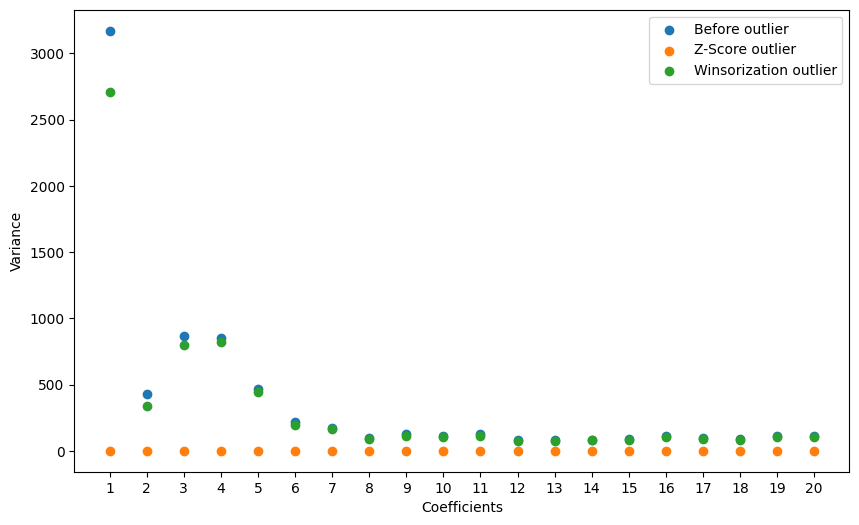

In [11]:
plt.figure(figsize=(10,6))

# for i in range(5):
plt.scatter(np.arange(20) + 1, var_before_outlier, label = 'Before outlier')
plt.scatter(np.arange(20) + 1, var_after_outlier_zscore, label = 'Z-Score outlier')
plt.scatter(np.arange(20) + 1, var_after_outlier_winsorize, label = 'Winsorization outlier')
plt.xticks(np.arange(20) + 1)
plt.xlabel('Coefficients')
plt.ylabel('Variance')


plt.legend()
plt.show()

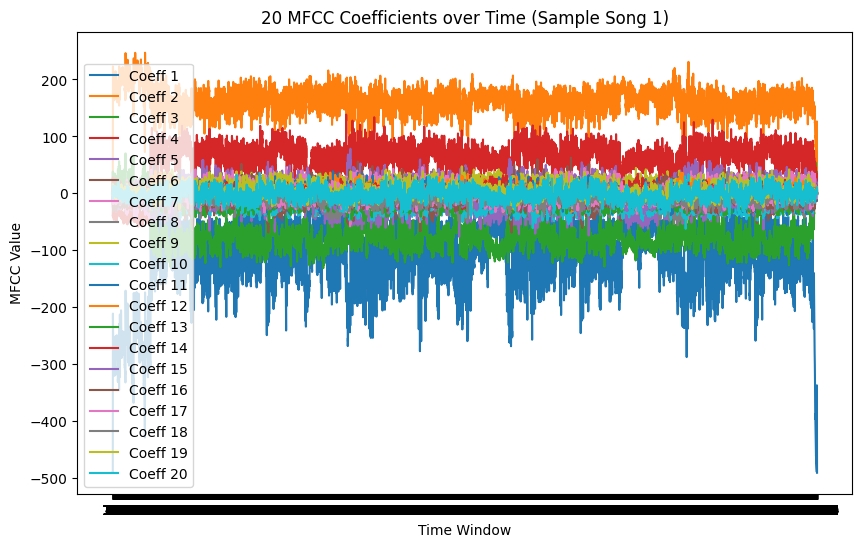

In [12]:
# Plot MFCC coefficients over time for one song (e.g., Song 0)
plt.figure(figsize=(10, 6))

for i in range(20):  # Plotting first 5 MFCC coefficients as an example
    plt.plot(mfcc_data[0].iloc[i, :], label=f'Coeff {i+1}')
    
plt.title('20 MFCC Coefficients over Time (Sample Song 1)')
plt.xlabel('Time Window')
plt.ylabel('MFCC Value')
plt.legend()
plt.show()


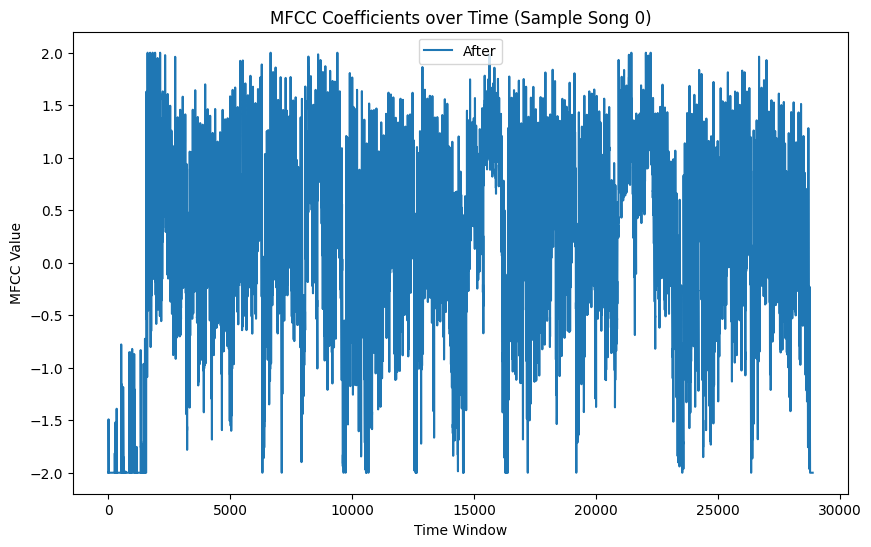

In [13]:
# Plot MFCC coefficients over time for one song (e.g., Song 0)
plt.figure(figsize=(10, 6))

for i in range(1):  # Plotting first 5 MFCC coefficients as an example
    # plt.plot(mfcc_data[0].iloc[i, :], label='Before')
    plt.plot(zscore_outlier_data[0].iloc[i, :], label=f'After')
    
    
plt.title('MFCC Coefficients over Time (Sample Song 0)')
plt.xlabel('Time Window')
plt.ylabel('MFCC Value')
plt.legend()
plt.show()


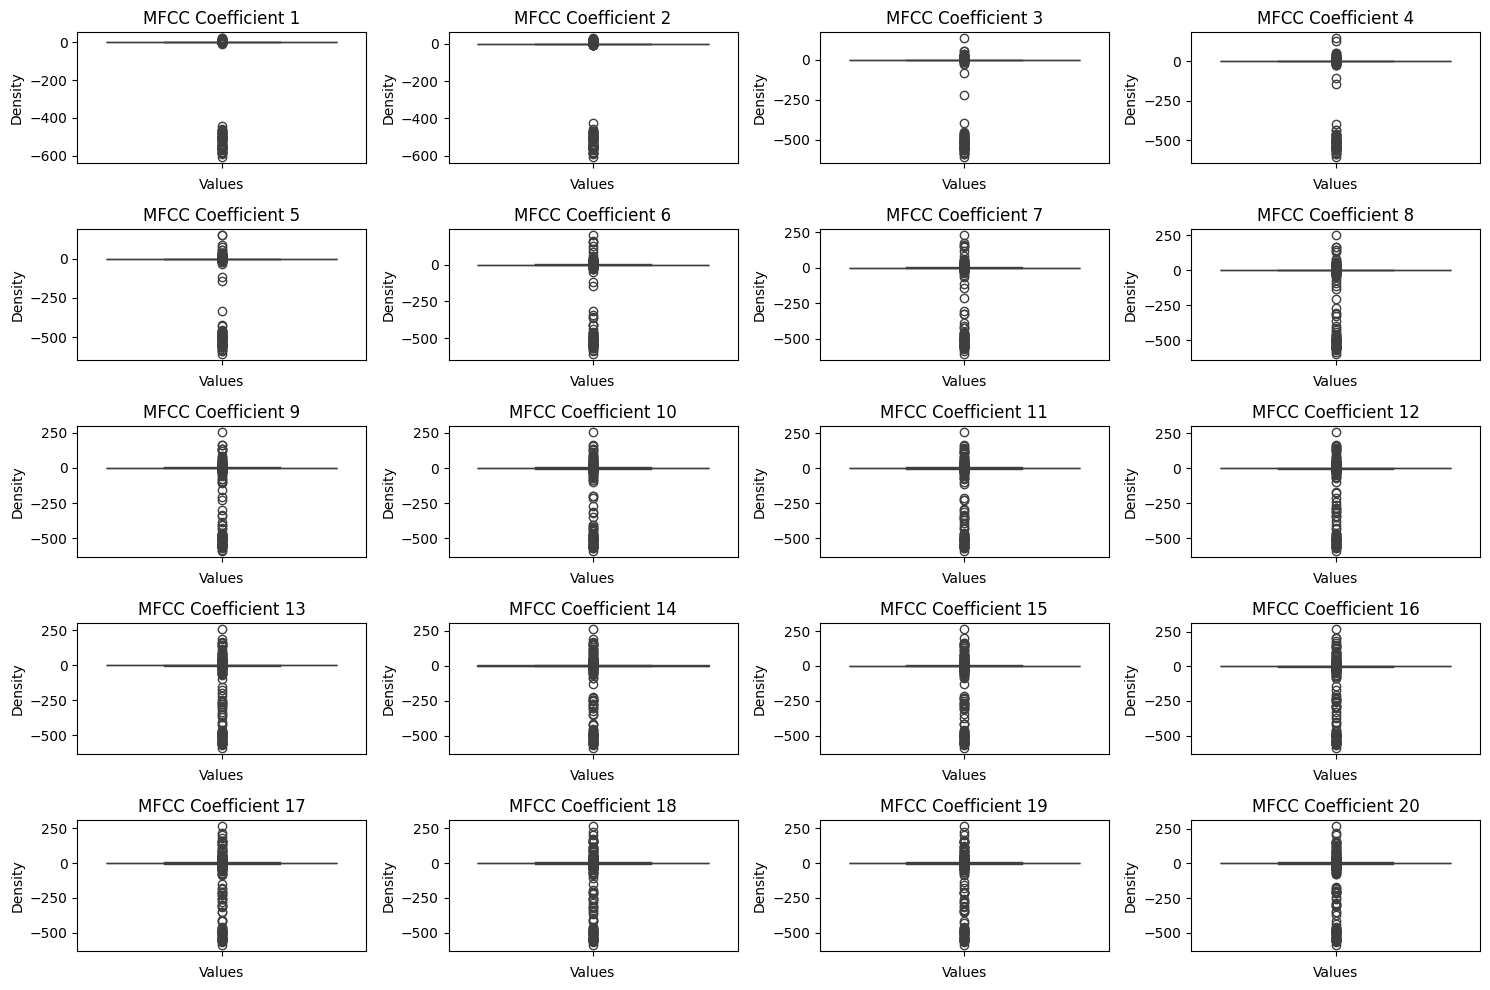

In [14]:
combined_mfcc_df = pd.concat(mfcc_data, ignore_index=True)

# Reshape the data for easier plotting
# Each row will represent an MFCC coefficient across all songs
reshaped_data = combined_mfcc_df.T  # Transpose to have MFCC coefficients as rows

# Generate box plots for each of the 20 MFCC coefficients
plt.figure(figsize=(15, 10))
for i in range(20):
    plt.subplot(5, 4, i + 1)  # Create a grid of subplots (5 rows, 4 columns)
    sns.boxplot(data=reshaped_data.iloc[i])  # Box plot for the ith MFCC coefficient
    plt.title(f'MFCC Coefficient {i + 1}')
    plt.xlabel('Values')
    plt.ylabel('Density')

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()

In [15]:
mfcc_data=zscore_outlier_data

In [16]:
def smooth_mfcc_data(data, window_size=3):
    smoothed_data = []

    for mfcc_df in data:
        # Calculate rolling mean and median (axis=1 for rows)
        rolling_mean = mfcc_df.rolling(window=window_size, axis=1, min_periods=1).mean()
        rolling_median = mfcc_df.rolling(window=window_size, axis=1, min_periods=1).median()

        # Fill NaNs at the edges
        rolling_mean.fillna(method='bfill', inplace=True)
        rolling_mean.fillna(method='ffill', inplace=True)

        rolling_median.fillna(method='bfill', inplace=True)
        rolling_median.fillna(method='ffill', inplace=True)

        # Choose either rolling_mean or rolling_median to keep the same structure
        # Here we choose rolling_mean, but you can switch to rolling_median if preferred
        smoothed_data.append(rolling_mean)

    return smoothed_data

# Smooth the MFCC data
smoothed_data = smooth_mfcc_data(mfcc_data)

# Convert the smoothed results back to DataFrames for easier viewing
smoothed_df = pd.concat(smoothed_data, axis=0)

# Display the first few rows of the smoothed DataFrame
print("Smoothed DataFrame (Mean):")
print(smoothed_df.head())

/var/folders/7p/d217p6713972xw562cx4xj880000gp/T/ipykernel_12498/1565928840.py:6: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  rolling_mean = mfcc_df.rolling(window=window_size, axis=1, min_periods=1).mean()
/var/folders/7p/d217p6713972xw562cx4xj880000gp/T/ipykernel_12498/1565928840.py:7: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  rolling_median = mfcc_df.rolling(window=window_size, axis=1, min_periods=1).median()
/var/folders/7p/d217p6713972xw562cx4xj880000gp/T/ipykernel_12498/1565928840.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rolling_mean.fillna(method='bfill', inplace=True)
/var/folders/7p/d217p6713972xw562cx4xj880000gp/T/ipykernel_12498/1565928840.py:11: FutureWarning: DataFrame.filln

Smoothed DataFrame (Mean):
      0         1         2         3         4         5         6      \
0 -2.000000 -2.000000 -2.000000 -2.000000 -2.000000 -2.000000 -2.000000   
1 -2.000000 -2.000000 -2.000000 -2.000000 -2.000000 -2.000000 -2.000000   
2  2.000000  2.000000  2.000000  2.000000  2.000000  2.000000  2.000000   
3 -1.984240 -1.984240 -1.984240 -1.984240 -1.984240 -1.984240 -1.984240   
4 -0.060653 -0.060653 -0.060653 -0.060653 -0.060653 -0.060653 -0.060653   

      7         8         9      ...  47947  47948  47949  47950  47951  \
0 -2.000000 -2.000000 -2.000000  ...    NaN    NaN    NaN    NaN    NaN   
1 -2.000000 -2.000000 -2.000000  ...    NaN    NaN    NaN    NaN    NaN   
2  2.000000  2.000000  2.000000  ...    NaN    NaN    NaN    NaN    NaN   
3 -1.984240 -1.984240 -1.984240  ...    NaN    NaN    NaN    NaN    NaN   
4 -0.060653 -0.060653 -0.060653  ...    NaN    NaN    NaN    NaN    NaN   

   47952  47953  47954  47955  47956  
0    NaN    NaN    NaN    NaN   

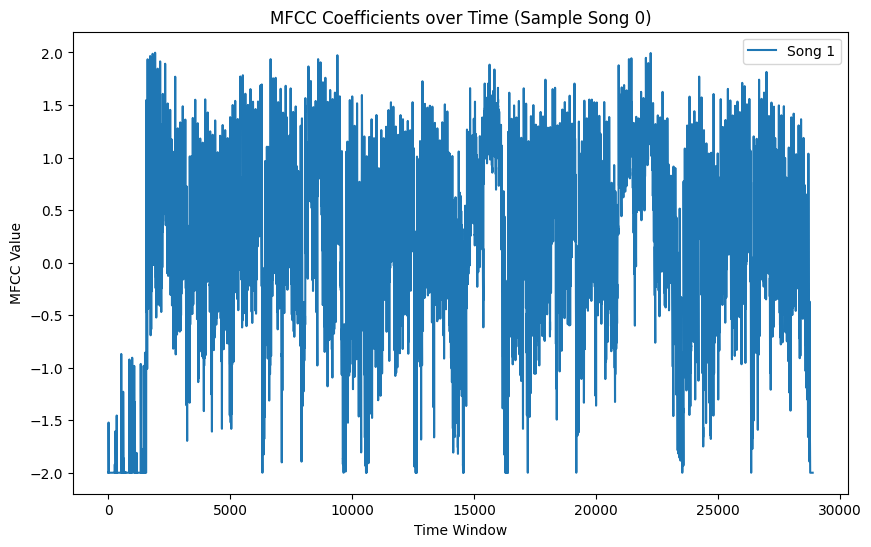

In [17]:
# Plot MFCC coefficients over time for one song (e.g., Song 0)
plt.figure(figsize=(10, 6))

for i in range(1):  # Plotting first 5 MFCC coefficients as an example
    plt.plot(smoothed_data[i].iloc[0, :], label=f'Song {i + 1}')
    
plt.title('MFCC Coefficients over Time (Sample Song 0)')
plt.xlabel('Time Window')
plt.ylabel('MFCC Value')
plt.legend()
plt.show()

In [18]:
mfcc_data=smoothed_data

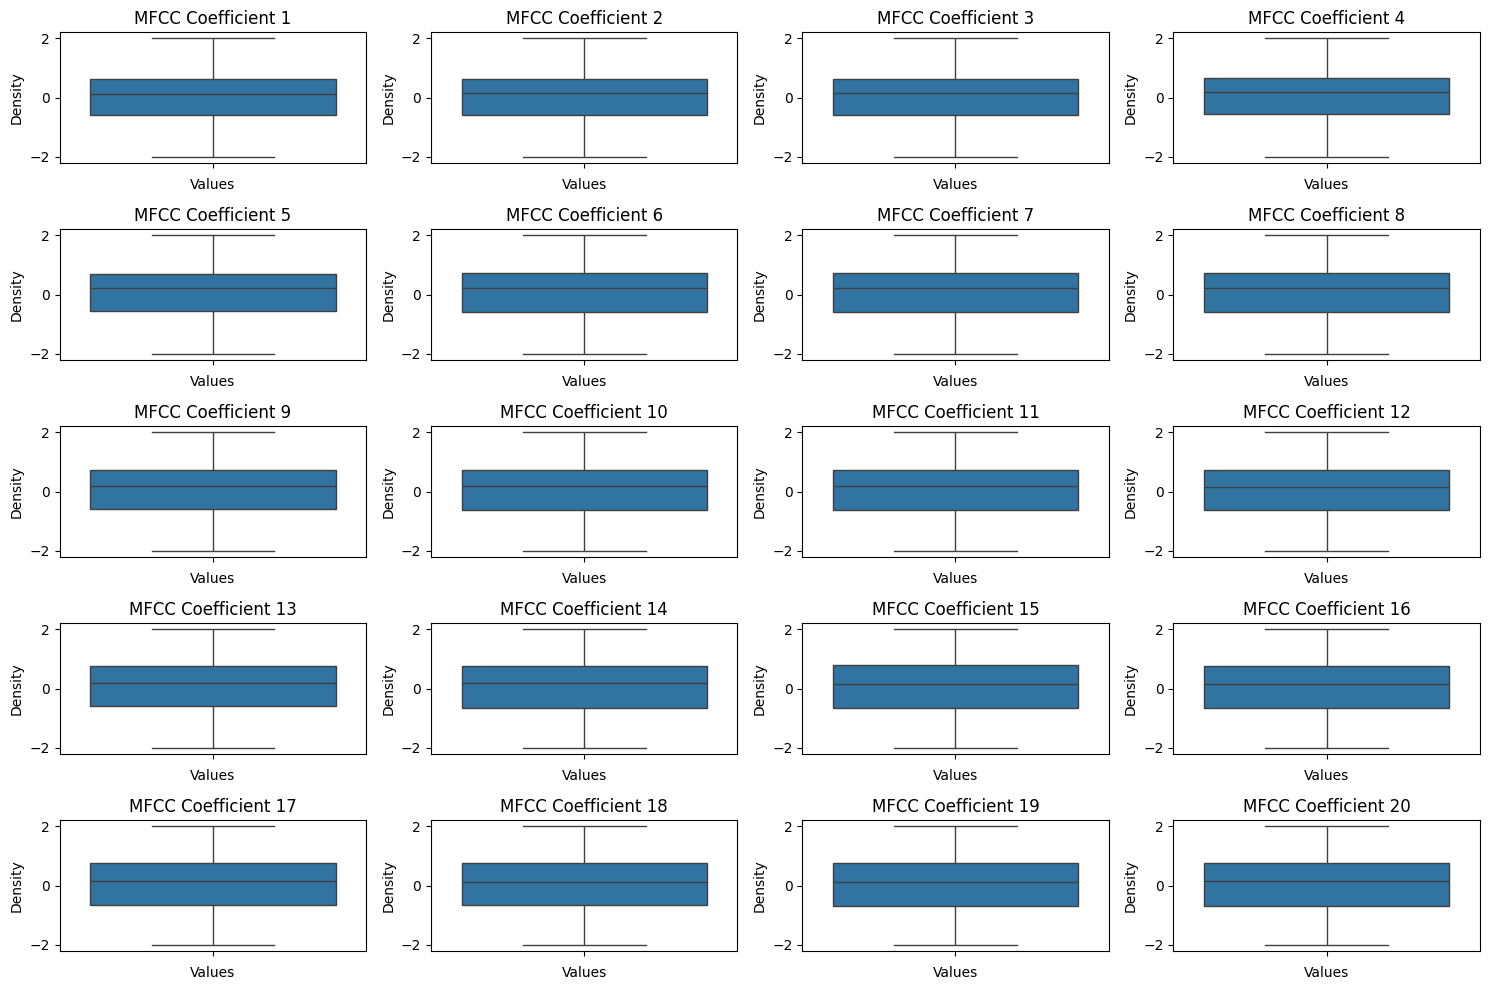

In [19]:
combined_mfcc_df = pd.concat(mfcc_data, ignore_index=True)

# Reshape the data for easier plotting
# Each row will represent an MFCC coefficient across all songs
reshaped_data = combined_mfcc_df.T  # Transpose to have MFCC coefficients as rows

# Generate box plots for each of the 20 MFCC coefficients
plt.figure(figsize=(15, 10))
for i in range(20):
    plt.subplot(5, 4, i + 1)  # Create a grid of subplots (5 rows, 4 columns)
    sns.boxplot(data=reshaped_data.iloc[i])  # Box plot for the ith MFCC coefficient
    plt.title(f'MFCC Coefficient {i + 1}')
    plt.xlabel('Values')
    plt.ylabel('Density')

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()

In [20]:
import numpy as np
import librosa
from scipy import stats, signal
import pandas as pd
from scipy.fft import fft
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import euclidean_distances

In [21]:
def extract_enhanced_mfcc_features(mfcc_matrix):
    """
    Extract enhanced features from MFCC coefficients matrix, specifically designed
    for music and voice classification.
    
    Parameters:
    mfcc_matrix: numpy array of shape (20, n_timestamps)
        The MFCC coefficients matrix
    
    Returns:
    dict: Dictionary containing extracted features
    """
    features = {}
    
    # 1. Basic Statistical Features (from previous code)
    for i in range(20):
        coeff = mfcc_matrix[i, :]
        
        # Calculate first-order deltas (velocity)
        delta = librosa.feature.delta(coeff.reshape(1, -1), width=19)
        
        # Calculate second-order deltas (acceleration)
        delta_delta = librosa.feature.delta(delta, order=2, width=19)
        
        # Basic statistics for original coefficients
        features[f'mfcc{i}_mean'] = np.mean(coeff)
        features[f'mfcc{i}_std'] = np.std(coeff)
        features[f'mfcc{i}_median'] = np.median(coeff)
        
        # Statistics for deltas (velocity features)
        features[f'mfcc{i}_delta_mean'] = np.mean(delta)
        features[f'mfcc{i}_delta_std'] = np.std(delta)
        features[f'mfcc{i}_delta_max'] = np.max(np.abs(delta))
        
        # Statistics for delta-deltas (acceleration features)
        features[f'mfcc{i}_delta2_mean'] = np.mean(delta_delta)
        features[f'mfcc{i}_delta2_std'] = np.std(delta_delta)
        features[f'mfcc{i}_delta2_max'] = np.max(np.abs(delta_delta))
        
        # Temporal variation features
        features[f'mfcc{i}_delta_zero_crossings'] = np.sum(np.diff(np.signbit(delta)))
        features[f'mfcc{i}_delta2_zero_crossings'] = np.sum(np.diff(np.signbit(delta_delta)))
        
        # Energy-related features
        features[f'mfcc{i}_delta_energy'] = np.sum(delta ** 2)
        features[f'mfcc{i}_delta2_energy'] = np.sum(delta_delta ** 2)
        
        # Ratio features
        features[f'mfcc{i}_delta_energy_ratio'] = features[f'mfcc{i}_delta_energy'] / np.sum(coeff ** 2)
        features[f'mfcc{i}_delta2_energy_ratio'] = features[f'mfcc{i}_delta2_energy'] / features[f'mfcc{i}_delta_energy']

    # 2. Rhythm-based Features
    for i in range(20):
        coeff = mfcc_matrix[i, :]
        
        # Detect peaks in the coefficient
        peaks, _ = signal.find_peaks(coeff)
        if len(peaks) > 1:
            # Average distance between peaks (rhythm indicator)
            features[f'mfcc{i}_peak_distance_mean'] = np.mean(np.diff(peaks))
            features[f'mfcc{i}_peak_distance_std'] = np.std(np.diff(peaks))
        else:
            features[f'mfcc{i}_peak_distance_mean'] = 0
            features[f'mfcc{i}_peak_distance_std'] = 0
        
        # Number of peaks normalized by length
        features[f'mfcc{i}_peak_density'] = len(peaks) / len(coeff)
    
    # 3. Spectral Features
    for i in range(20):
        coeff = mfcc_matrix[i, :]
        
        # FFT for frequency analysis
        fft_vals = np.abs(fft(coeff))
        
        # Spectral centroid (brightness of sound)
        freqs = np.fft.fftfreq(len(coeff))
        features[f'mfcc{i}_spectral_centroid'] = np.sum(freqs * fft_vals) / np.sum(fft_vals)
        
        # Spectral rolloff (shape of spectrum)
        cumsum = np.cumsum(fft_vals)
        rolloff_point = np.where(cumsum >= 0.85 * cumsum[-1])[0][0]
        features[f'mfcc{i}_spectral_rolloff'] = rolloff_point / len(fft_vals)
    
    # 4. Temporal Segmentation Features
    segment_size = mfcc_matrix.shape[1] // 3  # Split into three segments
    
    for i in range(20):
        coeff = mfcc_matrix[i, :]
        
        # Features for beginning, middle, and end of song
        features[f'mfcc{i}_begin_mean'] = np.mean(coeff[:segment_size])
        features[f'mfcc{i}_middle_mean'] = np.mean(coeff[segment_size:2*segment_size])
        features[f'mfcc{i}_end_mean'] = np.mean(coeff[2*segment_size:])
    
    # 5. Cross-MFCC Dynamic Features
    # Compute pairwise differences between consecutive frames
    deltas = np.diff(mfcc_matrix, axis=1)
    
    # Overall dynamics
    features['total_dynamics'] = np.mean(np.abs(deltas))
    features['dynamics_std'] = np.std(deltas)
    
    # Compute acceleration (second-order differences)
    accel = np.diff(deltas, axis=1)
    features['total_acceleration'] = np.mean(np.abs(accel))
    features['acceleration_std'] = np.std(accel)
    
    # 6. Structural Features
    # Silence detection (low energy frames)
    energy = np.sum(mfcc_matrix ** 2, axis=0)
    silence_threshold = np.mean(energy) * 0.1
    silence_frames = np.sum(energy < silence_threshold)
    features['silence_ratio'] = silence_frames / len(energy)
    
    # Variation over time windows
    window_size = min(100, mfcc_matrix.shape[1] // 10)
    for i in range(0, 20, 4):  # Take every 4th coefficient to reduce dimensionality
        coeff = mfcc_matrix[i, :]
        windows = np.array_split(coeff, 10)  # Split into 10 windows
        window_means = [np.mean(w) for w in windows]
        features[f'mfcc{i}_temporal_variation'] = np.std(window_means)
    
    return features

def get_feature_importance(X, y, n_estimators=100):
    """
    Train a Random Forest classifier and return feature importance
    """
    from sklearn.ensemble import RandomForestClassifier
    
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X, y)
    
    # Get feature importance
    importance_dict = dict(zip(X.columns, rf.feature_importances_))
    return dict(sorted(importance_dict.items(), key=lambda x: x[1], reverse=True))

def visualize_features(features_df, target_labels=None):
    """
    Create visualizations of the features
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Select top numerical columns (exclude file_name and other non-numeric)
    numeric_cols = features_df.select_dtypes(include=[np.number]).columns
    
    # Create correlation heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(features_df[numeric_cols].corr(), cmap='coolwarm', center=0)
    plt.title('Feature Correlation Heatmap')
    plt.tight_layout()
    plt.show()
    
    if target_labels is not None:
        # Box plots for top features by class
        for col in numeric_cols[:5]:  # Plot top 5 features
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=target_labels, y=features_df[col])
            plt.title(f'{col} Distribution by Class')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

In [22]:
mfcc_df = pd.concat(mfcc_data, ignore_index=True)

# Convert the DataFrame to a numpy array
mfcc_array = mfcc_df.values.reshape(len(mfcc_data), 20, -1).transpose((0, 2, 1))

# Apply the feature extraction function
features_list = []
for i in range(mfcc_array.shape[0]):
    mfcc_matrix = mfcc_array[i]
    features = extract_enhanced_mfcc_features(mfcc_matrix)
    features_list.append(features)

# Convert the list of feature dicts to a DataFrame
features_df = pd.DataFrame(features_list)

In [23]:
features_df

,mfcc0_mean,mfcc0_std,mfcc0_median,mfcc0_delta_mean,mfcc0_delta_std,mfcc0_delta_max,mfcc0_delta2_mean,mfcc0_delta2_std,mfcc0_delta2_max,mfcc0_delta_zero_crossings,...,total_dynamics,dynamics_std,total_acceleration,acceleration_std,silence_ratio,mfcc0_temporal_variation,mfcc4_temporal_variation,mfcc8_temporal_variation,mfcc12_temporal_variation,mfcc16_temporal_variation
0,0.113884,1.129363,0.192557,0.064363,0.018247,0.082610,-4.485886e-19,0.000081,0.000081,0,...,NaN,NaN,NaN,NaN,0.0,0.766217,0.766217,0.766217,0.785616,0.451555
1,-0.226961,1.138762,-0.098432,0.031646,0.015514,0.047160,-7.318365e-20,0.000069,0.000069,0,...,NaN,NaN,NaN,NaN,0.0,0.662184,0.662184,0.769265,0.862032,0.868571
2,0.676364,1.208181,0.810022,0.053600,0.024936,0.078536,-1.111307e-19,0.000110,0.000110,0,...,NaN,NaN,NaN,NaN,0.0,1.003247,1.003247,0.626327,0.770680,0.681793
3,-0.292557,0.793525,-0.103392,0.041055,0.012793,0.053849,1.836367e-19,0.000057,0.000057,0,...,NaN,NaN,NaN,NaN,0.0,0.579428,0.579428,0.579428,0.591792,0.613477
4,-0.229690,0.926506,-0.131840,0.031551,0.015293,0.046845,-5.204170e-19,0.000068,0.000068,0,...,NaN,NaN,NaN,NaN,0.0,0.635004,0.635004,0.635004,0.635004,0.635004
5,0.012975,1.014628,0.100953,0.036512,0.017136,0.053648,-3.442342e-19,0.000076,0.000076,0,...,NaN,NaN,NaN,NaN,0.0,0.717628,0.717628,0.717628,0.717628,0.717628
6,-0.319308,1.009107,-0.167744,0.038000,0.012253,0.050253,-4.357137e-19,0.000054,0.000054,0,...,NaN,NaN,NaN,NaN,0.0,0.575934,0.575934,0.575934,0.575934,0.575934
7,-0.301786,0.973335,-0.242990,0.055037,0.011227,0.066264,-1.247510e-18,0.000050,0.000050,0,...,NaN,NaN,NaN,NaN,0.0,0.641486,0.641486,0.641486,0.641486,0.641486
8,-0.154868,0.949600,-0.014909,0.042774,0.016141,0.058915,-6.301925e-19,0.000071,0.000071,0,...,NaN,NaN,NaN,NaN,0.0,0.651401,0.651401,0.816579,0.800706,0.790740
9,-0.266725,0.790210,-0.118359,0.053222,0.016264,0.069487,-1.558541e-19,0.000072,0.000072,0,...,NaN,NaN,NaN,NaN,0.0,0.605217,0.605217,0.605217,0.605217,0.605217


In [24]:
scaler = StandardScaler()
data_standardized = scaler.fit_transform(features_df)
data_standardized_df = pd.DataFrame(data_standardized, columns=features_df.columns)
data_standardized_df.to_csv("final_train.csv")


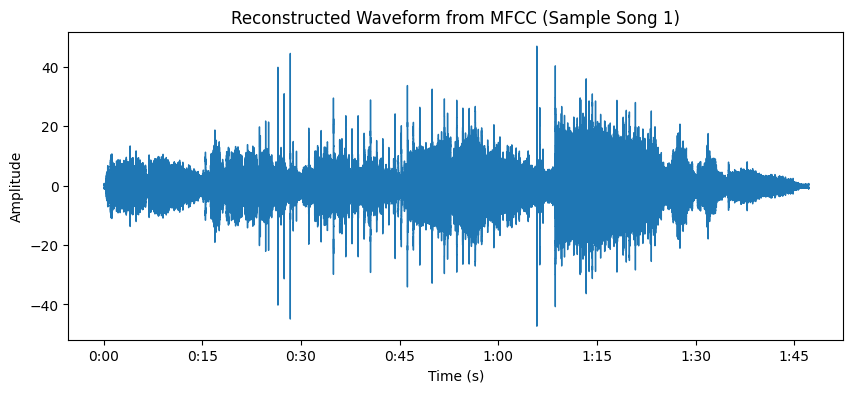

In [25]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the MFCC coefficients from a CSV file
mfcc_df = pd.read_csv('MFCC-files-v2/02-MFCC.csv')
mfcc_data = mfcc_df.values  # Convert to numpy array

# Parameters (these should match the parameters used during MFCC extraction)
sr = 44100  # Sampling rate used in your MFCC extraction
n_mfcc = mfcc_data.shape[0]  # Number of MFCC coefficients

# Step 2: Inverse MFCC transformation
# Convert MFCCs back to mel spectrogram

mel_spec = librosa.feature.inverse.mfcc_to_mel(mfcc_data, n_mels=128)

# Convert mel spectrogram to a linear spectrogram
spec = librosa.feature.inverse.mel_to_stft(mel_spec, sr=sr)

# Step 3: Reconstruct the waveform using the Griffin-Lim algorithm
reconstructed_audio = librosa.griffinlim(spec)

# Save or display the waveform
#librosa.output.write_wav('reconstructed_audio.wav', reconstructed_audio, sr)

# Optional: Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(reconstructed_audio, sr=sr)
plt.title('Reconstructed Waveform from MFCC (Sample Song 1)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()